- Apply PCA to the dataset at your disposa (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [1]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x19bf31a6b50>)

In [2]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
#print(df_stars['Star type'])

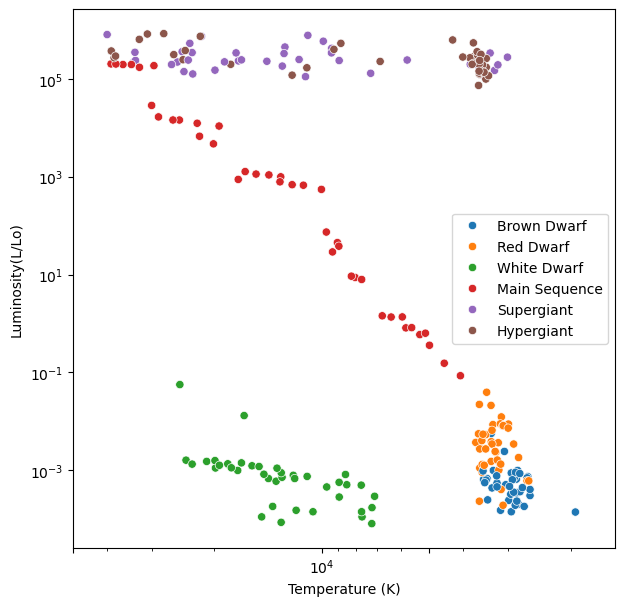

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

The columns with numbers are 0 to 3: 4 features which we want to reduce to 2 using PCA.

In [10]:
from sklearn.decomposition import PCA

In [40]:
import numpy as np
X = np.vstack((df_stars['Temperature (K)'], df_stars['Luminosity(L/Lo)'], df_stars['Radius(R/Ro)'], df_stars['Absolute magnitude(Mv)']))

pca = PCA(n_components = 2)
pca.fit(X)
eigenvalues = pca.transform(X)
eigenvectors = pca.components_

In [44]:
print(eigenvectors.shape)
print(pca.explained_variance_ratio_)

(2, 240)
[0.99726852 0.00272838]


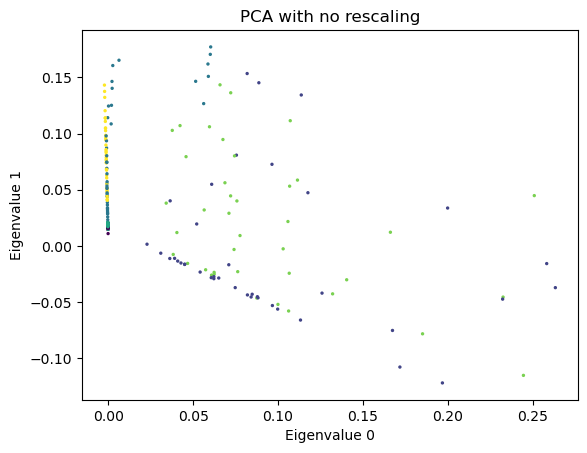

In [62]:
plt.scatter(eigenvectors[0], eigenvectors[1], s = 2, c = labels)
plt.xlabel('Eigenvalue 0')
plt.ylabel('Eigenvalue 1')
plt.title('PCA with no rescaling')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [54]:
print(scaler.mean_.shape)
X_scaled = scaler.transform(X)
print(X_scaled.shape)
#print(X_scaled)

(240,)
(4, 240)


In [49]:
pca_scaled = PCA(n_components = 2)
pca_scaled.fit(X_scaled)

PCA(n_components=2)

In [51]:
eigenvalues_s = pca_scaled.transform(X)
eigenvectors_s = pca_scaled.components_

In [52]:
print(eigenvectors_s.shape)
print(pca_scaled.explained_variance_ratio_)

(2, 240)
[0.67988004 0.32011448]


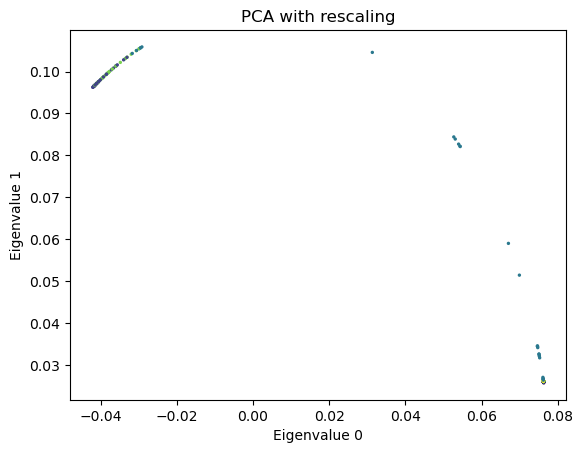

In [61]:
plt.scatter(eigenvectors_s[0], eigenvectors_s[1], s = 2, c = labels)
plt.xlabel('Eigenvalue 0')
plt.ylabel('Eigenvalue 1')
plt.title('PCA with rescaling')
plt.show()